# Spectrum kernel with Logistic Regression

In [20]:
import sys
sys.path.append('D:/Documents/University/MVA/Kernel Methods/mva-KMML-challenge/General')
sys.path.append('D:/Documents/University/MVA/Kernel Methods/mva-KMML-challenge/Logistic Regression')

import pandas as pd
import numpy as np
from time import time

from kernel_functions import kernel_spectrum
from spectrum_toolbox import preindexation,Spectrum_embedding


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import scipy.sparse as sp

import matplotlib.pyplot as plt

from time import time

In [2]:
from Kernel_logistic_regression import KernelLogisticRegression

In [3]:
def GridSearch_spectrum(X,y,hyperparameters,K = 5):
    scores_mean = []
    scores_std = []
    
    kf = KFold(n_splits = K)
    
    params = dict()
    
    for element in hyperparameters:
        params['k'] = element
        preindex = preindexation(params['k'])
        print(params['k'], preindex)
        
        acc = []
        X_emb = Spectrum_embedding(X,params['k'],preindex = preindex)

        for train_idx,test_idx in kf.split(X):
                model = KernelLogisticRegression("spectrum", parameters = None)
                Xtrain,Xtest = X_emb[train_idx,:],X_emb[test_idx,:]
                ytrain,ytest = y[train_idx],y[test_idx]              
                model.fit(Xtrain,ytrain)
                ypred = model.predict_class(Xtest)

                acc.append(accuracy(ytest, ypred))
            
                scores_mean.append(np.array(acc).mean())
                scores_std.append(np.array(acc).std())
                
        print(np.array(acc).mean())
        del(preindex)
    return(scores_mean,scores_std)

In [21]:
def GridSearch_spectrum_fast(X,y,hyperparameters,K = 5):
    scores_mean = []
    scores_std = []
    
    kf = KFold(n_splits = K)
    
    params = dict()
    
    for element in hyperparameters:
        params['k'] = element
        preindex = preindexation(params['k'])
        print(params['k'])
        
        acc = []
        X_emb = Spectrum_embedding(X,params['k'],preindex = preindex)
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_emb, y, test_size= 0.2)
        model = KernelLogisticRegression("spectrum", parameters = None)
        model.fit(Xtrain,ytrain)
        ypred = model.predict_class(Xtest)
        
        scores_mean.append(accuracy(ytest, ypred))
        print(accuracy(ytest, ypred))
        
    del(preindex)
    return(scores_mean,scores_std)

In [33]:
def GridSearch_spectrum_reg(X,y,hyperparameters, k):
    scores_mean = []
    scores_std = []
    
    
    params = dict()
    
    for element in hyperparameters:
        params['k'] = element
        preindex = preindexation(k)
        print(params['k'])
        
        acc = []
        X_emb = Spectrum_embedding(X,k,preindex = preindex)
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_emb, y, test_size= 0.2)
        model = KernelLogisticRegression("spectrum", parameters = None)
        model.fit(Xtrain,ytrain, element)
        ypred = model.predict_class(Xtest)
        
        scores_mean.append(accuracy(ytest, ypred))
        print(accuracy(ytest, ypred))
        
    del(preindex)
    return(scores_mean,scores_std)

## K = 0

In [8]:
X = pd.read_csv('data/Xtr0.csv')
y = pd.read_csv('data/ytr0.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
0,TCCTGTGCACATCTGCACCCCTGTTGTGGCCACAAAATGATCCGGC...
1,TTAAGTGTATATCTAATAATTTTTTTGCCTACATTCCTGTGTTACC...
2,GTGCTCAATTAGTTGCCTACAAATAGTAGCCTGGCACAGTGTAAGC...
3,CACCTGGAAAATACAAACAGGCGCAAGAAGAGTTAACCCACAGATC...
4,AAATCACTGCCTATCCTTGGGCCAAAAGGTTTCTACAGGAAGCTGC...


In [5]:
parameters = {}
K = KernelLogisticRegression("spectrum", parameters = None)

In [6]:
X_emb = Spectrum_embedding(X['seq'],7,preindex = preindexation(7))

In [7]:
a = np.arange(10)
a.copy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
type(X_emb), X_emb.shape

(scipy.sparse.csr.csr_matrix, (2000, 16384))

In [9]:
K.fit(X_emb[:100], y['Bound'].to_numpy()[:100])

In [10]:
type(X_emb[:100])

scipy.sparse.csr.csr_matrix

In [11]:
X_emb[:100].copy()

<100x16384 sparse matrix of type '<class 'numpy.float64'>'
	with 9331 stored elements in Compressed Sparse Row format>

In [12]:
K.X_train

<100x16384 sparse matrix of type '<class 'numpy.float64'>'
	with 9331 stored elements in Compressed Sparse Row format>

In [13]:
K.predict_class(X_emb[:100])

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.])

In [15]:
hyperparameters = [4,5,6,7,8,9]

In [16]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

4 {'AAAA': 0, 'AAAT': 1, 'AAAC': 2, 'AAAG': 3, 'AATA': 4, 'AATT': 5, 'AATC': 6, 'AATG': 7, 'AACA': 8, 'AACT': 9, 'AACC': 10, 'AACG': 11, 'AAGA': 12, 'AAGT': 13, 'AAGC': 14, 'AAGG': 15, 'ATAA': 16, 'ATAT': 17, 'ATAC': 18, 'ATAG': 19, 'ATTA': 20, 'ATTT': 21, 'ATTC': 22, 'ATTG': 23, 'ATCA': 24, 'ATCT': 25, 'ATCC': 26, 'ATCG': 27, 'ATGA': 28, 'ATGT': 29, 'ATGC': 30, 'ATGG': 31, 'ACAA': 32, 'ACAT': 33, 'ACAC': 34, 'ACAG': 35, 'ACTA': 36, 'ACTT': 37, 'ACTC': 38, 'ACTG': 39, 'ACCA': 40, 'ACCT': 41, 'ACCC': 42, 'ACCG': 43, 'ACGA': 44, 'ACGT': 45, 'ACGC': 46, 'ACGG': 47, 'AGAA': 48, 'AGAT': 49, 'AGAC': 50, 'AGAG': 51, 'AGTA': 52, 'AGTT': 53, 'AGTC': 54, 'AGTG': 55, 'AGCA': 56, 'AGCT': 57, 'AGCC': 58, 'AGCG': 59, 'AGGA': 60, 'AGGT': 61, 'AGGC': 62, 'AGGG': 63, 'TAAA': 64, 'TAAT': 65, 'TAAC': 66, 'TAAG': 67, 'TATA': 68, 'TATT': 69, 'TATC': 70, 'TATG': 71, 'TACA': 72, 'TACT': 73, 'TACC': 74, 'TACG': 75, 'TAGA': 76, 'TAGT': 77, 'TAGC': 78, 'TAGG': 79, 'TTAA': 80, 'TTAT': 81, 'TTAC': 82, 'TTAG': 83,

D:\Anaconda\lib\site-packages\cvxpy\problems\problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
D:\Anaconda\lib\site-packages\cvxpy\problems\problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
D:\Anaconda\lib\site-packages\cvxpy\problems\problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


0.5654999999999999
6 {'AAAAAA': 0, 'AAAAAT': 1, 'AAAAAC': 2, 'AAAAAG': 3, 'AAAATA': 4, 'AAAATT': 5, 'AAAATC': 6, 'AAAATG': 7, 'AAAACA': 8, 'AAAACT': 9, 'AAAACC': 10, 'AAAACG': 11, 'AAAAGA': 12, 'AAAAGT': 13, 'AAAAGC': 14, 'AAAAGG': 15, 'AAATAA': 16, 'AAATAT': 17, 'AAATAC': 18, 'AAATAG': 19, 'AAATTA': 20, 'AAATTT': 21, 'AAATTC': 22, 'AAATTG': 23, 'AAATCA': 24, 'AAATCT': 25, 'AAATCC': 26, 'AAATCG': 27, 'AAATGA': 28, 'AAATGT': 29, 'AAATGC': 30, 'AAATGG': 31, 'AAACAA': 32, 'AAACAT': 33, 'AAACAC': 34, 'AAACAG': 35, 'AAACTA': 36, 'AAACTT': 37, 'AAACTC': 38, 'AAACTG': 39, 'AAACCA': 40, 'AAACCT': 41, 'AAACCC': 42, 'AAACCG': 43, 'AAACGA': 44, 'AAACGT': 45, 'AAACGC': 46, 'AAACGG': 47, 'AAAGAA': 48, 'AAAGAT': 49, 'AAAGAC': 50, 'AAAGAG': 51, 'AAAGTA': 52, 'AAAGTT': 53, 'AAAGTC': 54, 'AAAGTG': 55, 'AAAGCA': 56, 'AAAGCT': 57, 'AAAGCC': 58, 'AAAGCG': 59, 'AAAGGA': 60, 'AAAGGT': 61, 'AAAGGC': 62, 'AAAGGG': 63, 'AATAAA': 64, 'AATAAT': 65, 'AATAAC': 66, 'AATAAG': 67, 'AATATA': 68, 'AATATT': 69, 'AATATC'

0.596
7 {'AAAAAAA': 0, 'AAAAAAT': 1, 'AAAAAAC': 2, 'AAAAAAG': 3, 'AAAAATA': 4, 'AAAAATT': 5, 'AAAAATC': 6, 'AAAAATG': 7, 'AAAAACA': 8, 'AAAAACT': 9, 'AAAAACC': 10, 'AAAAACG': 11, 'AAAAAGA': 12, 'AAAAAGT': 13, 'AAAAAGC': 14, 'AAAAAGG': 15, 'AAAATAA': 16, 'AAAATAT': 17, 'AAAATAC': 18, 'AAAATAG': 19, 'AAAATTA': 20, 'AAAATTT': 21, 'AAAATTC': 22, 'AAAATTG': 23, 'AAAATCA': 24, 'AAAATCT': 25, 'AAAATCC': 26, 'AAAATCG': 27, 'AAAATGA': 28, 'AAAATGT': 29, 'AAAATGC': 30, 'AAAATGG': 31, 'AAAACAA': 32, 'AAAACAT': 33, 'AAAACAC': 34, 'AAAACAG': 35, 'AAAACTA': 36, 'AAAACTT': 37, 'AAAACTC': 38, 'AAAACTG': 39, 'AAAACCA': 40, 'AAAACCT': 41, 'AAAACCC': 42, 'AAAACCG': 43, 'AAAACGA': 44, 'AAAACGT': 45, 'AAAACGC': 46, 'AAAACGG': 47, 'AAAAGAA': 48, 'AAAAGAT': 49, 'AAAAGAC': 50, 'AAAAGAG': 51, 'AAAAGTA': 52, 'AAAAGTT': 53, 'AAAAGTC': 54, 'AAAAGTG': 55, 'AAAAGCA': 56, 'AAAAGCT': 57, 'AAAAGCC': 58, 'AAAAGCG': 59, 'AAAAGGA': 60, 'AAAAGGT': 61, 'AAAAGGC': 62, 'AAAAGGG': 63, 'AAATAAA': 64, 'AAATAAT': 65, 'AAATAAC': 

0.638
8 {'AAAAAAAA': 0, 'AAAAAAAT': 1, 'AAAAAAAC': 2, 'AAAAAAAG': 3, 'AAAAAATA': 4, 'AAAAAATT': 5, 'AAAAAATC': 6, 'AAAAAATG': 7, 'AAAAAACA': 8, 'AAAAAACT': 9, 'AAAAAACC': 10, 'AAAAAACG': 11, 'AAAAAAGA': 12, 'AAAAAAGT': 13, 'AAAAAAGC': 14, 'AAAAAAGG': 15, 'AAAAATAA': 16, 'AAAAATAT': 17, 'AAAAATAC': 18, 'AAAAATAG': 19, 'AAAAATTA': 20, 'AAAAATTT': 21, 'AAAAATTC': 22, 'AAAAATTG': 23, 'AAAAATCA': 24, 'AAAAATCT': 25, 'AAAAATCC': 26, 'AAAAATCG': 27, 'AAAAATGA': 28, 'AAAAATGT': 29, 'AAAAATGC': 30, 'AAAAATGG': 31, 'AAAAACAA': 32, 'AAAAACAT': 33, 'AAAAACAC': 34, 'AAAAACAG': 35, 'AAAAACTA': 36, 'AAAAACTT': 37, 'AAAAACTC': 38, 'AAAAACTG': 39, 'AAAAACCA': 40, 'AAAAACCT': 41, 'AAAAACCC': 42, 'AAAAACCG': 43, 'AAAAACGA': 44, 'AAAAACGT': 45, 'AAAAACGC': 46, 'AAAAACGG': 47, 'AAAAAGAA': 48, 'AAAAAGAT': 49, 'AAAAAGAC': 50, 'AAAAAGAG': 51, 'AAAAAGTA': 52, 'AAAAAGTT': 53, 'AAAAAGTC': 54, 'AAAAAGTG': 55, 'AAAAAGCA': 56, 'AAAAAGCT': 57, 'AAAAAGCC': 58, 'AAAAAGCG': 59, 'AAAAAGGA': 60, 'AAAAAGGT': 61, 'AAAAAGGC

0.6469999999999999
9 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.639
20212.466827630997


In [17]:
print(mean)

[0.5875, 0.60875, 0.5950000000000001, 0.5900000000000001, 0.5920000000000001, 0.59, 0.5762499999999999, 0.565, 0.56375, 0.5654999999999999, 0.6475, 0.61625, 0.6033333333333334, 0.59875, 0.596, 0.6375, 0.6487499999999999, 0.6449999999999999, 0.643125, 0.638, 0.6425, 0.65875, 0.6491666666666666, 0.6556249999999999, 0.6469999999999999, 0.6325, 0.66375, 0.6441666666666667, 0.64625, 0.639]


In [18]:
len(mean)

30

In [22]:
mean[4], mean[9], mean[14], mean[19],mean[24],mean[29]

(0.5920000000000001,
 0.5654999999999999,
 0.596,
 0.638,
 0.6469999999999999,
 0.639)

In [9]:
# We choose 8 as it has the highest performance on the validation sets
k = 8

y = y['Bound'].to_numpy()

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)


In [16]:
y[y==0].shape, y.shape, y[y==0].shape[0]/ y.shape[0]

((1038,), (2000,), 0.519)

In [11]:
model0 = KernelLogisticRegression("spectrum", parameters = None)
model0.fit(Xtrain,y)

In [17]:
p = 0.519
(model0.predict_class(Xtrain)==y).mean(), (model0.predict_class(Xtrain, p = p)==y).mean()

(1.0, 1.0)

In [18]:
Xtest = pd.read_csv('data/Xte0.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)

y_pred0 = model0.predict_class(Xtest, p = p)

In [59]:
model0 = SVM(c= c)
model0.fit(Ktrain,y[:,None])

In [60]:
(model0.predict_class(Ktrain)==y).mean()

0.988

In [63]:
Xtest = pd.read_csv('data/Xte0.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred0 = model0.predict_class(Ktest)
ypred0[ypred0==-1]=0

## K = 1

In [27]:
X = pd.read_csv('data/Xtr1.csv')
y = pd.read_csv('data/ytr1.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
2000,AGAAATGAAAGTCATCCAAATAGGAAGAGAAGGAGTCAAAATATCC...
2001,TTCTCTCCAGCACTCTTGTCACCAACTCACATACCATACAGTTTAC...
2002,ACAGCTGACAAGCAGAACCCAGGGTCACAAGGATCCCATTCATGTG...
2003,CAAACTTTTCTATGTTTAGCCATGTGTTAATTAATAAGAAATGTTC...
2004,CTTCGTGGTTGGTCAAGAACGGCAGGAGGTATTTGCCCATCGGTGC...


In [28]:
# Findin the best hyperparameter
hyperparameters = [4,5,6,7,8,9]
mean = GridSearch_spectrum_fast(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)

4
0.5725
5


D:\Anaconda\lib\site-packages\cvxpy\problems\problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


0.5875
6
0.6225
7
0.63
8
0.64
9
0.63


In [29]:
mean

([0.5725, 0.5875, 0.6225, 0.63, 0.64, 0.63], [])

In [ ]:
# Findin the best hyperparameter (reg)
hyperparameters = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6, 1e-7]
mean_reg = GridSearch_spectrum_reg(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters, 8)

0.1


In [9]:
# We choose 8 as it has the highest performance on the validation sets
k = 8

y = y['Bound'].to_numpy()

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)


In [26]:
y[y==0].shape, y.shape, y[y==0].shape[0]/ y.shape[0]

((999,), (2000,), 0.4995)

In [11]:
model1 = KernelLogisticRegression("spectrum", parameters = None)
model1.fit(Xtrain,y)

In [17]:
p = 0.4995
(model1.predict_class(Xtrain)==y).mean(), (model1.predict_class(Xtrain, p = p)==y).mean()

(1.0, 1.0)

In [68]:
Xtest = pd.read_csv('data/Xte1.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
ypred1 = model1.predict_class(Xtest)

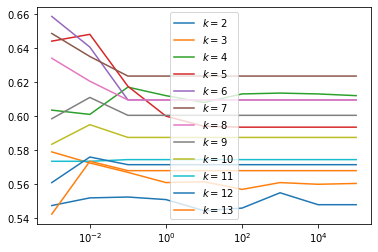

In [6]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


In [65]:
k = 6
c = 1e-3

y = y['Bound'].to_numpy()
y[y==0] = -1

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)
Ktrain = kernel_spectrum(Xtrain,Xtrain,{})

In [66]:
model1 = SVM(c= c)
model1.fit(Ktrain,y[:,None])

In [67]:
(model1.predict_class(Ktrain)==y).mean()

0.8135

In [68]:
Xtest = pd.read_csv('data/Xte1.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred1 = model1.predict_class(Ktest)
ypred1[ypred1==-1]=0

## K = 2

In [69]:
X = pd.read_csv('data/Xtr2.csv')
y = pd.read_csv('data/ytr2.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
4000,GTGCCGACGCAGCGGTGTTGCACCTCCCTCTCCGGCTCTGCTGCCC...
4001,CCTGAGTTTGGTGTTCTGTGGAATTATTGAACCTAAGTAGGTAGTG...
4002,CCAGGTGCTTACCATTATCATGTAAGTTCTCTAACTGTTTCATGTG...
4003,AGAGCGGTGTGGGGGTCACTCAAGAGAACGTGCTGTACCTTGTCAG...
4004,CCCCAGGGGCAGGCGGGCTAGCCCCCCCATCATATGCAAATCATGG...


In [12]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

5581.852656841278


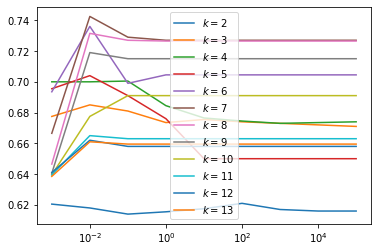

In [13]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


In [70]:
k = 7
c = 1e-2

y = y['Bound'].to_numpy()
y[y==0] = -1

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)
Ktrain = kernel_spectrum(Xtrain,Xtrain,{})

In [71]:
model2 = SVM(c= c)
model2.fit(Ktrain,y[:,None])

In [72]:
(model2.predict_class(Ktrain)==y).mean()

0.979

In [73]:
Xtest = pd.read_csv('data/Xte2.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred2 = model2.predict_class(Ktest)
ypred2[ypred2==-1]=0

In [97]:
ypred0 = np.hstack((pd.read_csv('data/Xte0.csv')['Id'].to_numpy()[:,None],ypred0[:,None]))
ypred1 = np.hstack((pd.read_csv('data/Xte1.csv')['Id'].to_numpy()[:,None],ypred1[:,None]))
ypred2 = np.hstack((pd.read_csv('data/Xte2.csv')['Id'].to_numpy()[:,None],ypred2[:,None]))

In [98]:
ypred = np.vstack((ypred0,ypred1,ypred2))

In [100]:
ypred

array([[   0,    1],
       [   1,    1],
       [   2,    1],
       ...,
       [2997,    0],
       [2998,    0],
       [2999,    1]])

In [106]:
pd.DataFrame(ypred, columns = ["Id", "Bound"]).set_index('Id').to_csv("SVM_Spectrum.csv")

In [105]:
pd.DataFrame(ypred, columns = ["Id", "Bound"]).set_index('Id')

,Bound
Id,
0,1
1,1
2,1
3,1
4,0
...,...
2995,1
2996,0
2997,0


In [95]:
pd.read_csv('data/Xte0.csv')['Id'].to_numpy().shape

(1000,)